# Python and CLI for Data Science - Session 08

- *Course*: Python and CLI for Data Science
- *Session*: 08
- *Unit*: SciPy Hypothesis Testing

## SciPy Hypothesis Testing

### (Re)sources:
- [Statistical Hypothesis Tests in Python - Cheat Sheet](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) _by Jason Brownlee_


Hypothesis testing is a powerful tool in statistics to determine whether a result is statistically significant, that is, whether this result occurred by chance or not. 
In this session, we will use the SciPy library to perform hypothesis testing.

Different statistical tests exist, depending on the type of data, the question we want to answer, and the assumptions the test makes about the data. 
We will focus on the most common and useful ones.

In general, hypothesis testing works by computing a test statistic from the data, and comparing it to a critical value. 
If the test statistic is greater than the critical value, we reject the null hypothesis. 
Otherwise, we fail to reject it.
We will look at an example for each test, and see how to perform it in Python.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive
from scipy import stats

rng = np.random.RandomState(42)

plt.ion()
%matplotlib widget

## SciPy

Before we start, let's first look at a couple of properties of the SciPy stats module. SciPy stats contains a large number of statistical functions, including probability distributions, statistical functions, and statistical tests. For example, we can use the `norm.pdf` function to generate a normal distribution with mean 0 and standard deviation 1. `pdf` stands for the probability density function. It returns the probability of a given x value occurring in the distribution.

interactive(children=(FloatSlider(value=180.0, description='val', max=280.0, min=80.0), Output()), _dom_classe…

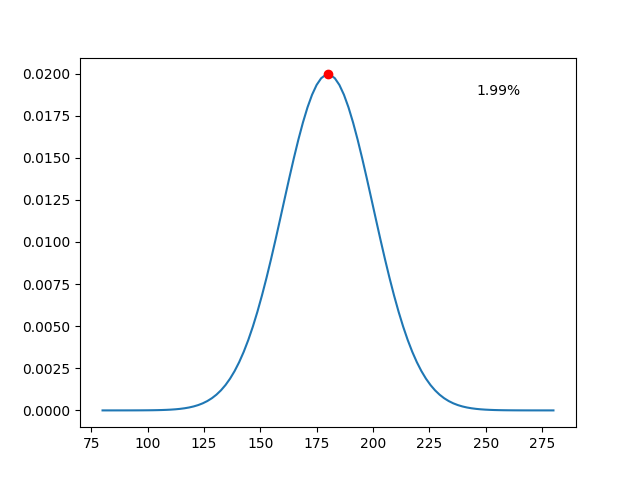

In [7]:
mu, sigma = 180, 20
min_val, max_val = mu - 5 * sigma, mu + 5 * sigma
x = np.linspace(min_val, max_val, 100)

fig, ax = plt.subplots()

def update(val):
    ax.clear()
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y)
    prob = stats.norm.pdf(val, mu, sigma)
    ax.text(0.8, 0.9, f"{prob * 100:.2f}%", transform=ax.transAxes)
    ax.plot(val, prob, "ro")

interactive(update, val=(min_val, max_val, 0.1))

A second important concept is the cumulative density function, or `cdf`. It returns the probability of a value less than or equal to a given x value. The animation below visualizes te relationship between the pdf and cdf for a normal distribution. The cdf is the integral of the pdf.

interactive(children=(FloatSlider(value=80.0, description='x_fill', max=280.0, min=80.0), Output()), _dom_clas…

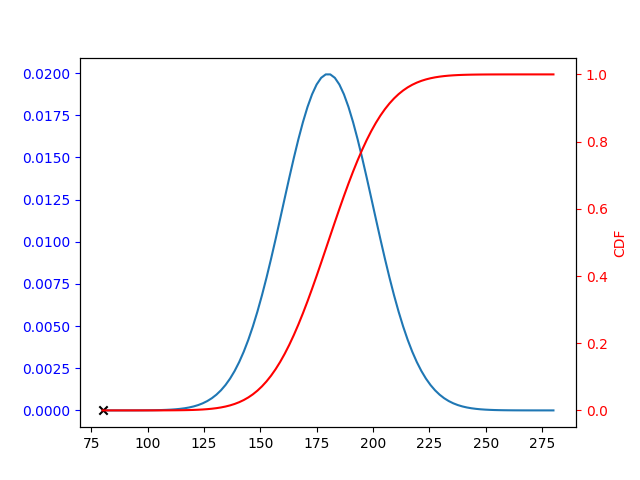

In [14]:
mu, sigma = 180, 20
min_val, max_val = mu - 5 * sigma, mu + 5 * sigma
x = np.linspace(min_val, max_val, 100)

pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)

fig, ax1 = plt.subplots()

x_fill = min_val
ax1.plot(x, pdf)
ax1.set_ylabel("PDF", color="blue")
ax1.tick_params("y", colors="blue")

ax2 = ax1.twinx()
ax2.plot(x, cdf, color="red")
ax2.set_ylabel("CDF", color="red")
ax2.tick_params("y", colors="red")
scatter = ax2.scatter(
    [x_fill], [stats.norm.cdf(x_fill, mu, sigma)], marker="x", color="black"
)


def update(x_fill=0):
    ax1.clear()
    ax1.plot(x, pdf)
    ax1.fill_between(x, pdf, where=(x <= x_fill), color="blue", alpha=0.3)
    scatter.set_offsets([[x_fill, stats.norm.cdf(x_fill, mu, sigma)]])


interactive(update, x_fill=(min_val, max_val, 0.1))

To sample random values from a distribution, we can use the `rvs` function. It takes the number of samples as an argument. The animation below shows the result of sampling 1000 values from a normal distribution.

interactive(children=(IntSlider(value=49991, description='samples', max=100000, min=1, step=10), Output()), _d…

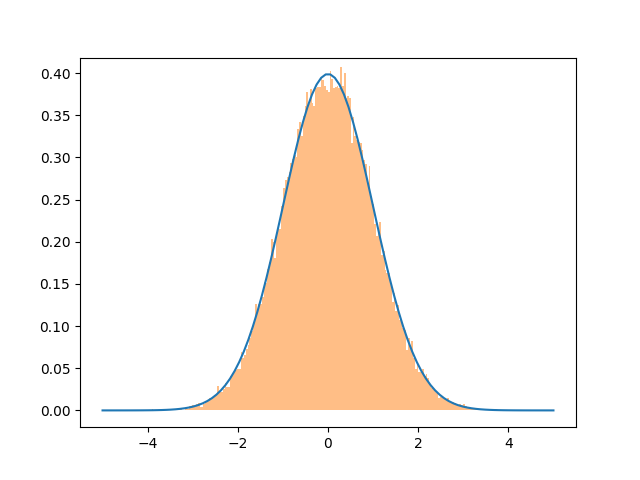

In [10]:
mu, sigma = 0, 1
min_val, max_val = mu - 5 * sigma, mu + 5 * sigma
x = np.linspace(min_val, max_val, 100)

fig, ax = plt.subplots()
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()


def update(samples):
    ax.clear()
    ax.plot(x, y)
    sample = stats.norm.rvs(mu, sigma, size=samples, random_state=rng)
    ax.hist(sample, density=True, bins=int(np.sqrt(samples)), alpha=0.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


interactive(update, samples=(1, 100000, 10))

SciPy includes a variety of other probability distributions. The documentation is available [here](https://docs.scipy.org/doc/scipy/reference/stats.html).

For example, by exchanging `norm` with `uniform`, we can generate a uniform distribution. The uniform distribution is a continuous distribution with equal probability for all values between a minimum and maximum value. The probability density function is a horizontal line between the minimum and maximum value, and 0 elsewhere.

interactive(children=(FloatSlider(value=3.5, description='val', max=6.5, min=0.5), IntSlider(value=4901, descr…

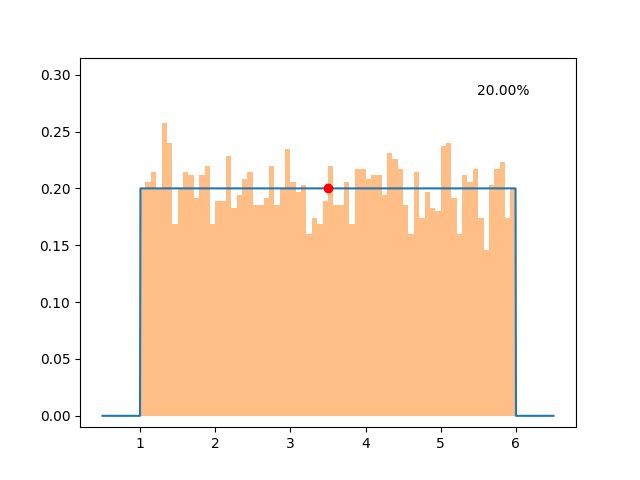

In [15]:
min_val, width = 1, 5
x = np.linspace(min_val - width * 0.1, min_val + width * 1.1, 1000)

fig, ax = plt.subplots()
y = stats.uniform.pdf(x, min_val, width)
ax.plot(x, y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ylim = (ylim[0], ylim[1] * 1.5)


def update(val, samples):
    ax.clear()
    ax.plot(x, y)
    prob = stats.uniform.pdf(val, min_val, width)
    sample = stats.uniform.rvs(min_val, width, size=samples, random_state=42)
    ax.hist(sample, density=True, bins=int(np.sqrt(samples)), alpha=0.5)
    ax.text(0.8, 0.9, f"{prob * 100:.2f}%", transform=ax.transAxes)
    ax.plot(val, prob, "ro")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


interactive(update, val=(x.min(), x.max(), 0.1), samples=(1, 10000, 100))

## Testing for the same distribution

### Kolmogorov-Smirnov Test

To test if two samples come from the same distribution, we can use the Kolmogorov-Smirnov test. 

Assumptions:
  - Observations in each sample are independent and identically distributed (iid).

Interpretation:
  - H0: the two samples are drawn from the same distribution.
  - H1: the two samples are drawn from different distributions.

interactive(children=(IntSlider(value=500, description='n1', max=1000, min=10, step=10), IntSlider(value=500, …

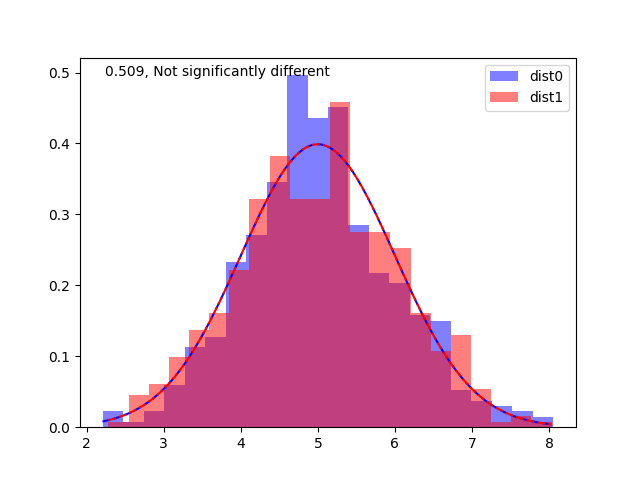

In [16]:
fig, ax = plt.subplots()


def update(n1, n2, mu1, mu2, dist1, dist2):
    rvs_list = []
    ax.clear()
    colors = ["blue", "red"]
    for idx, (n, mu, dist) in enumerate(zip((n1, n2), (mu1, mu2), (dist1, dist2))):
        dist = getattr(stats, dist)  # identical to stats.norm or stats.poisson
        rvs = dist.rvs(mu, random_state=rng, size=n)
        rvs_list.append(rvs)
        x = np.linspace(rvs.min(), rvs.max(), 100)
        pdf = dist.pdf(x, mu)
        ax.hist(
            rvs,
            bins=int(n**0.5),
            alpha=0.5,
            label=f"dist{idx}",
            density=True,
            color=colors[idx],
        )
        ax.plot(x, pdf, "--", color=colors[idx])
    ax.plot()
    ax.legend()
    ks_result = stats.ks_2samp(rvs_list[0], rvs_list[1])
    sig = ks_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax.text(0.05, 0.95, f"{ks_result.pvalue:.3f}, {sig_text}", transform=ax.transAxes)


interactive(
    update,
    n1=(10, 1000, 10),
    n2=(10, 1000, 10),
    mu1=(1, 10, 0.1),
    mu2=(1, 10, 0.1),
    dist1=["norm", "laplace", "chi2"],
    dist2=["norm", "laplace", "chi2"],
)

### Example

Comparing the distribution of the number of various features for the English Premier League for home and away teams.
    

interactive(children=(Dropdown(description='feature', options=('Goals', 'Shots', 'Corners', 'YellowCards'), va…

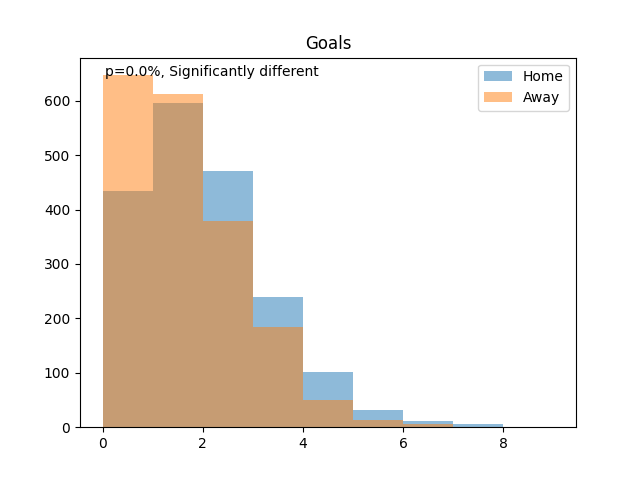

In [20]:
import requests
import io

url = (
    "https://raw.githubusercontent.com/tara-nguyen/english-premier-league-datasets-"
    "for-10-seasons/main/epldat10seasons/epl-allseasons-matchstats.csv"
)
pl_df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))

fig, ax = plt.subplots()


def update(feature, n):
    home = pl_df[f"Home{feature}"].sample(n, random_state=rng)
    away = pl_df[f"Away{feature}"].sample(n, random_state=rng)
    ax.clear()
    ax.hist(home, density=False, alpha=0.5, label="Home", bins=home.max())
    ax.hist(away, density=False, alpha=0.5, label="Away", bins=away.max())
    ax.legend()
    ax.set_title(feature)
    ks_result = stats.ks_2samp(home, away)
    sig = ks_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax.text(0.05, 0.95, f"p={ks_result.pvalue*100:3.1f}%, {sig_text}", transform=ax.transAxes)


interactive(
    update,
    feature=["Goals", "Shots", "Corners", "YellowCards"],
    n=(1, pl_df.shape[0], 10),
)

### Shapiro-Wilk Normality Test

A special case for testing for a distribution is the Shapiro-Wilk test for normality. It tests whether a sample comes from a normal distribution.

Assumptions:
  - Observations in each sample are independent and identically distributed (iid).

Interpretation:
  - H0: the sample has a Gaussian distribution.
  - H1: the sample does not have a Gaussian distribution.

interactive(children=(IntSlider(value=500, description='n', max=1000, min=10, step=10), FloatSlider(value=5.0,…

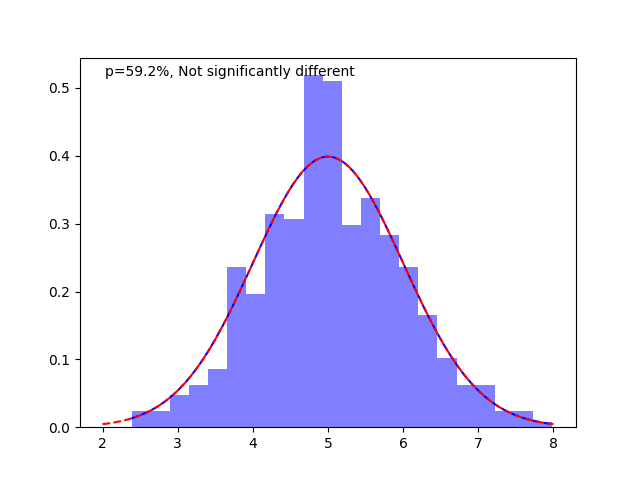

In [22]:
fig, ax = plt.subplots()


def update(n, mu, dist):
    dist = getattr(stats, dist)  # identical to stats.norm or stats.poisson
    ax.clear()
    rvs = dist.rvs(mu, random_state=rng, size=n)
    x = np.linspace(rvs.min(), rvs.max(), 100)
    ax.hist(
        rvs,
        bins=int(n**0.5),
        alpha=0.5,
        density=True,
        color="blue",
    )
    pdf = dist.pdf(x, mu)
    ax.plot(x, pdf, "--", color="blue")
    
    x = np.linspace(mu - 3, mu + 3, 100)
    pdf = stats.norm.pdf(x, mu)
    ax.plot(x, pdf, "--", color="red")
    
    shapiro_result = stats.shapiro(rvs)
    sig = shapiro_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax.text(0.05, 0.95, f"p={shapiro_result.pvalue*100:3.1f}%, {sig_text}", transform=ax.transAxes)


interactive(
    update,
    n=(10, 1000, 10),
    mu=(1, 10, 0.1),
    dist=["norm", "laplace", "chi2"],
)

### Example

Testing if the distribution of the number of goals scored per game in the English Premier League is (not) normal.

/tmp/ipykernel_11823/233415983.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


interactive(children=(Dropdown(description='feature', options=('Goals', 'Shots', 'Corners', 'YellowCards'), va…

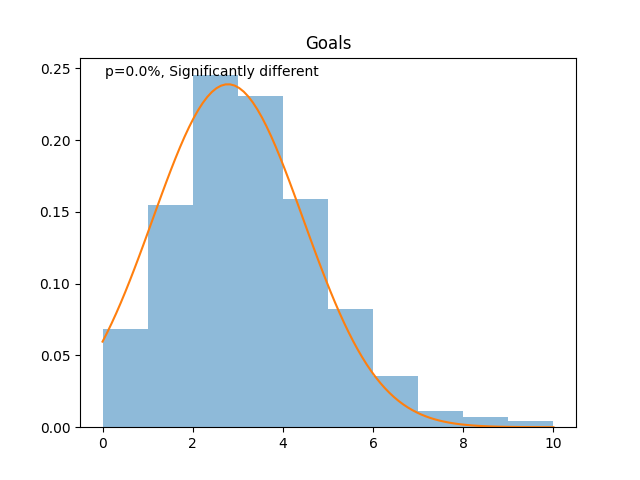

In [23]:
fig, ax = plt.subplots()


def update(feature, n):
    feature_series = pl_df[f"Home{feature}"] + pl_df[f"Away{feature}"]
    feature_series = feature_series.sample(n, random_state=rng)
    ax.clear()
    ax.hist(
        feature_series,
        density=True,
        alpha=0.5,
        bins=feature_series.max(),
    )
    ax.plot(
        np.linspace(feature_series.min(), feature_series.max(), 100),
        stats.norm.pdf(
            np.linspace(feature_series.min(), feature_series.max(), 100),
            feature_series.mean(),
            feature_series.std(),
        ),
    )
    ax.set_title(feature)
    shapiro_result = stats.shapiro(feature_series)
    sig = shapiro_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax.text(
        0.05, 0.95, f"p={shapiro_result.pvalue*100:3.1f}%, {sig_text}", transform=ax.transAxes
    )


interactive(
    update,
    feature=["Goals", "Shots", "Corners", "YellowCards"],
    n=(10, pl_df.shape[0], 10),
)

## Correlation Tests

### Pearson's/Spearman's Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

interactive(children=(IntSlider(value=50, description='n', min=10, step=10), FloatSlider(value=0.0, descriptio…

<function __main__.update(n, a, w, func, corr_func)>

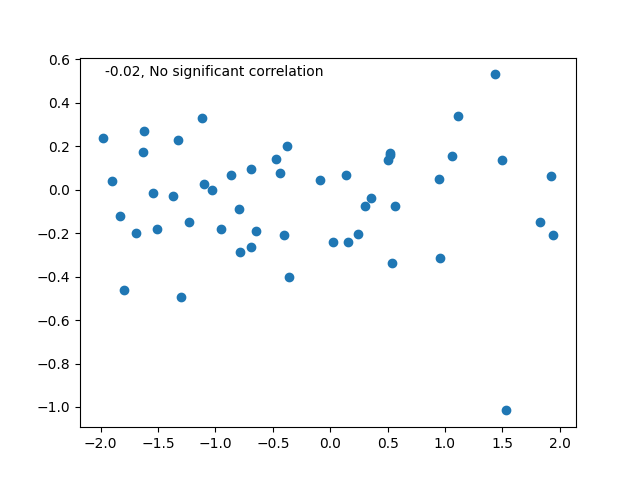

In [24]:
fig, ax = plt.subplots()

funcs = {
    "y=x": lambda x: x,
    "y=x^2": lambda x: x**2,
    "y=exp(x)": lambda x: np.exp(x),
}


def update(n, a, w, func, corr_func):
    x = stats.uniform.rvs(-2, 4, size=n, random_state=rng)
    y = funcs[func](x) * a + stats.norm.rvs(0, w, size=n, random_state=rng)
    ax.clear()
    ax.scatter(x, y)
    if corr_func == "pearson":
        corr_coeff, p_value = stats.pearsonr(x, y)
    elif corr_func == "spearman":
        corr_coeff, p_value = stats.spearmanr(x, y)
    else:
        raise ValueError("corr_func must be either pearson or spearman")
    sig_text = (
        "Signficant correlation" if p_value < 0.05 else "No significant correlation"
    )
    ax.text(0.05, 0.95, f"{corr_coeff:.2f}, {sig_text}", transform=ax.transAxes)


interact(
    update,
    n=(10, 100, 10),
    a=(-2, 2, 0.1),
    w=(0, 0.5, 0.01),
    func=funcs.keys(),
    corr_func=["pearson", "spearman"],
)

### Example

We want to measure the correlation of various diabetes-related features with the disease progression.

,corr_coeff,p_value,sig
age,0.1879,0.0001,True
sex,0.0431,0.3664,False
bmi,0.5865,0.0000,True
bp,0.4415,0.0000,True
s1,0.2120,0.0000,True
s2,0.1741,0.0002,True
s3,-0.3948,0.0000,True
s4,0.4305,0.0000,True
s5,0.5659,0.0000,True
s6,0.3825,0.0000,True


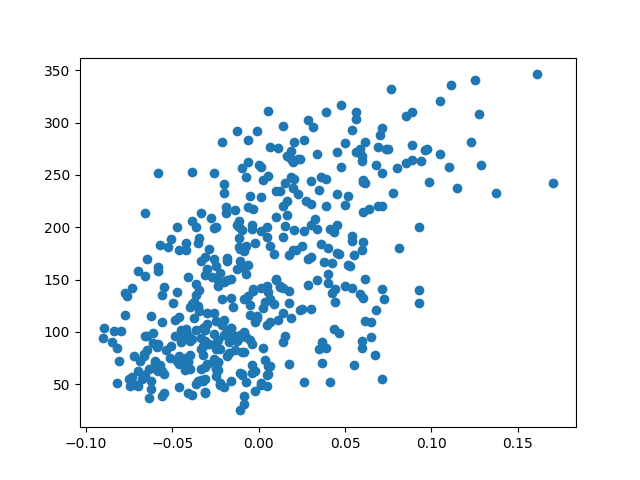

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["disease_progression"] = diabetes.target

corr_df = diabetes_df.apply(
    lambda x: stats.pearsonr(x, diabetes_df["disease_progression"]), axis=0
).T
corr_df.columns = ["corr_coeff", "p_value"]
corr_df["sig"] = corr_df["p_value"] < 0.05

fig, ax = plt.subplots()
display(corr_df.round(4))
x = diabetes_df["bmi"]
y = diabetes_df["disease_progression"]
ax.plot(x, y, "o")

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions:

- Observations used in the calculation of the contingency table are independent.
- 5 or more examples in each cell of the contingency table.

Interpretation:

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [30]:
rng = np.random.RandomState(42)


def update(n, p):
    x = stats.multinomial.rvs(n, p=[(1 - p) / 2, p / 2, p / 2, (1 - p) / 2])
    x = x.reshape(2, 2)
    df = pd.DataFrame(x, columns=["A", "B"], index=["C", "D"])
    display(df)
    _, p, _, expected = stats.chi2_contingency(df)
    sig_text = "Signficant correlation" if p < 0.05 else "No significant correlation"
    expected_df = pd.DataFrame(expected, columns=["A", "B"], index=["C", "D"])
    display(expected_df)
    display(f"p={p*100:3.1f}%, {sig_text}")


interactive(update, n=(10, 1000, 10), p=(0, 1, 0.01))

interactive(children=(IntSlider(value=500, description='n', max=1000, min=10, step=10), FloatSlider(value=0.0,…

### Example

Investigating if correlations exist between a person's sex/class and if they survived the Titanic disaster.

In [31]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic_df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))

table = titanic_df.loc[:, ["survived", "sex"]].value_counts().unstack()
display(table)
_, p, _, expected = stats.chi2_contingency(table)
expected = pd.DataFrame(expected, columns=table.columns, index=table.index)
sig_text = "Signficant correlation" if p < 0.05 else "No significant correlation"
print(f"{p:.4f}, {sig_text}")
display(expected)

table = titanic_df.loc[:, ["survived", "class"]].value_counts().unstack()
display(table)
_, p, _, expected = stats.chi2_contingency(table)
expected = pd.DataFrame(expected, columns=table.columns, index=table.index)
sig_text = "Signficant correlation" if p < 0.05 else "No significant correlation"
print(f"{p:.4f}, {sig_text}")
display(expected)

sex,female,male
survived,,
0,81,468
1,233,109


0.0000, Signficant correlation


sex,female,male
survived,,
0,193.474747,355.525253
1,120.525253,221.474747


class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


0.0000, Signficant correlation


class,First,Second,Third
survived,,,
0,133.090909,113.373737,302.535354
1,82.909091,70.626263,188.464646


## Parametric Hypothesis Tests

### Student's t-test

Tests whether the means of two independent samples are significantly different.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation:

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.

interactive(children=(IntSlider(value=500, description='n1', max=1000, min=10, step=10), IntSlider(value=500, …

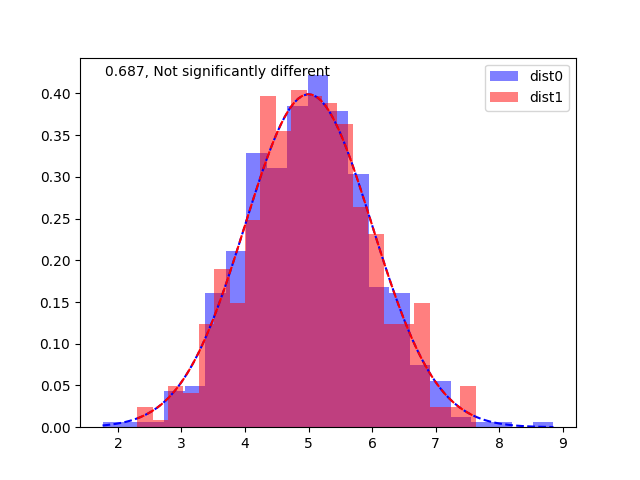

In [32]:
fig, ax = plt.subplots()


def update(n1, n2, mu1, mu2):
    dist = stats.norm
    rvs_list = []
    ax.clear()
    colors = ["blue", "red"]
    for idx, (n, mu) in enumerate(zip((n1, n2), (mu1, mu2))):
        rvs = dist.rvs(mu, random_state=rng, size=n)
        rvs_list.append(rvs)
        x = np.linspace(rvs.min(), rvs.max(), 100)
        pdf = dist.pdf(x, mu)
        ax.hist(
            rvs,
            bins=int(n**0.5),
            alpha=0.5,
            label=f"dist{idx}",
            density=True,
            color=colors[idx],
        )
        ax.plot(x, pdf, "--", color=colors[idx])
    ax.plot()
    ax.legend()
    ttest_result = stats.ttest_ind(rvs_list[0], rvs_list[1])
    sig = ttest_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax.text(0.05, 0.95, f"{ttest_result.pvalue:.3f}, {sig_text}", transform=ax.transAxes)


interactive(
    update,
    n1=(10, 1000, 10),
    n2=(10, 1000, 10),
    mu1=(1, 10, 0.1),
    mu2=(1, 10, 0.1),
)

### Example

Testing whether the means of the features of iris flowers are different.

interactive(children=(Dropdown(description='feature', options=('sepal length (cm)', 'sepal width (cm)', 'petal…

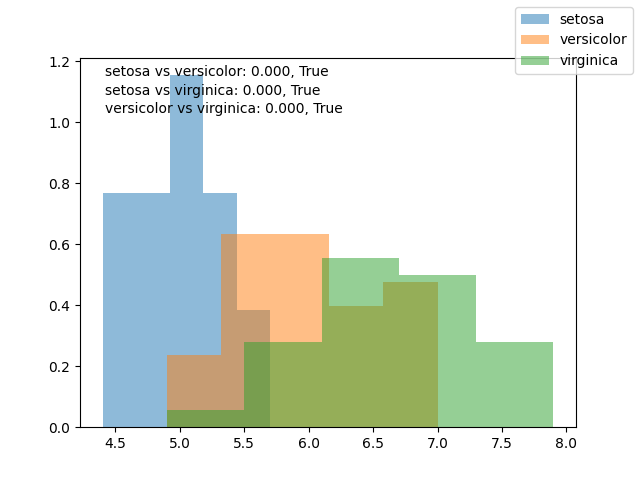

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["flower"] = iris.target
df["flower"] = df["flower"].map(
    {idx: target_name for idx, target_name in enumerate(iris.target_names)}
)

fig, ax = plt.subplots()


def update(feature, n):
    from itertools import combinations

    ax.clear()
    flowers = df["flower"].unique()

    sampled = df.groupby("flower").sample(n, random_state=rng)

    for flower in flowers:
        ax.hist(
            sampled[sampled["flower"] == flower][feature],
            label=flower,
            alpha=0.5,
            density=True,
            bins=int(n**0.5),
        )

    fig.legend()

    for idx, (flower1, flower2) in enumerate(combinations(flowers, 2)):
        sampled1 = sampled[sampled["flower"] == flower1]
        sampled2 = sampled[sampled["flower"] == flower2]
        ttest = stats.ttest_ind(sampled1[feature], sampled2[feature])
        sig = ttest.pvalue < 0.05
        ax.text(
            0.05,
            0.95 - idx * 0.05,
            f"{flower1} vs {flower2}: {ttest.pvalue:.3f}, {sig}",
            transform=ax.transAxes,
        )


interactive(
    update, feature=iris.feature_names, n=(10, df.groupby("flower").size().max(), 1)
)

## Non-parametric Tests

### Permutation Test

Tests whether a given statistic is significantly different between two samples.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
  
Interpretation:

- H0: The Data is randomly sampled from the same distribution.
- H1: The Data is not randomly sampled from the same distribution.

interactive(children=(IntSlider(value=500, description='n1', max=1000, min=10, step=10), IntSlider(value=500, …

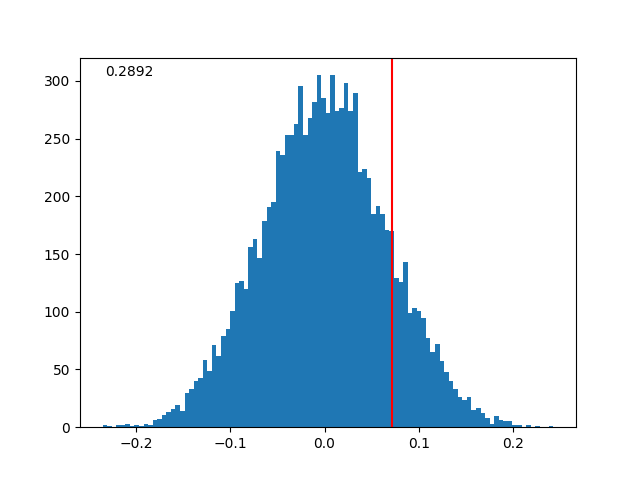

In [35]:
fig, ax = plt.subplots()


def statistic(x, y):
    return np.mean(x) - np.mean(y)


def update(n1, n2, mu1, mu2):
    x = stats.norm.rvs(size=n1, loc=mu1, random_state=rng)
    y = stats.norm.rvs(size=n2, loc=mu2, random_state=rng)

    result = stats.permutation_test((x, y), statistic)
    ax.clear()
    ax.hist(result.null_distribution, bins=int(result.null_distribution.size**0.5))
    ax.axvline(result.statistic, color="red")
    ax.text(0.05, 0.95, f"{result.pvalue:.4f}", transform=ax.transAxes)


interactive(
    update,
    n1=(10, 1000, 10),
    n2=(10, 1000, 10),
    mu1=(1, 10, 0.1),
    mu2=(1, 10, 0.1),
)

### Example

Evaluating if two classifiers perform significantly different on the iris dataset.

interactive(children=(FloatSlider(value=0.0, description='p1', max=1.0, step=0.01), FloatSlider(value=0.0, des…

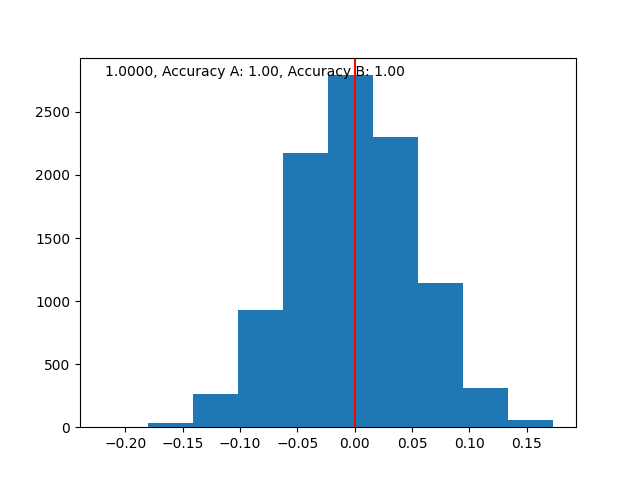

In [106]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["flower"] = iris.target
df["flower"] = df["flower"].map(
    {idx: target_name for idx, target_name in enumerate(iris.target_names)}
)


def accuracy(x1, x2, targets, axis=None):
    return np.mean(x1 == targets, axis) - np.mean(x2 == targets, axis)


fig, ax = plt.subplots()


def update(p1, p2):
    from functools import partial

    x1 = df["flower"].copy()
    x2 = df["flower"].copy()
    resample = rng.rand(x1.size) < p1
    x1[resample] = stats.randint.rvs(0, 3, size=x1[resample].size, random_state=rng)
    resample = rng.rand(x2.size) < p2
    x2[resample] = stats.randint.rvs(0, 3, size=x2[resample].size, random_state=rng)

    result = stats.permutation_test(
        (x1, x2), partial(accuracy, targets=df["flower"].values), vectorized=True
    )
    ax.clear()
    ax.hist(result.null_distribution)
    ax.axvline(result.statistic, color="red")
    acc1 = np.mean(x1 == df["flower"])
    acc2 = np.mean(x2 == df["flower"])
    ax.text(
        0.05,
        0.95,
        f"{result.pvalue:.4f}, Accuracy A: {acc1:.2f}, Accuracy B: {acc2:.2f}",
        transform=ax.transAxes,
    )


interactive(update, p1=(0, 1, 0.01), p2=(0, 1, 0.01))

# Multiple Comparisons Problem in Hypothesis Testing

When we perform a single hypothesis test at significance level $\alpha$ (e.g., 0.05),
there is a 5% chance of making a Type I error (rejecting a true null hypothesis).

However, when performing *multiple* tests simultaneously, the chance of making at least
one Type I error increases significantly.

This is called the **Multiple Comparisons Problem** or **Multiple Testing Problem**.


Lets just draw `M=100` times `N=30` samples from the same distribution significance level $\alpha=5\%$...

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set seed for reproducibility
# np.random.seed(42)

def multiple_comparisons(n_tests: int, n_samples: int) -> np.array:
    p_values = []
    for i in range(n_tests):
        group1 = np.random.normal(0, 1, n_samples)
        group2 = np.random.normal(0, 1, n_samples)  # same distribution
        _, p_val = stats.ttest_ind(group1, group2)
        p_values.append(p_val)
    return np.array(p_values)

p_values = multiple_comparisons(100, 30)

n_tests = 100
n_samples = 30
alpha = 0.05

print(f"Out of {n_tests} tests, {np.sum(p_values < alpha)} were significant at alpha = {alpha}")

Out of 100 tests, 5 were significant at alpha = 0.05


How many false positives do we expect?

We expect $M \cdot \alpha$ false positives. This is called the family-wise error rate (FWER), i.e. $\text{FWER} = \alpha$.

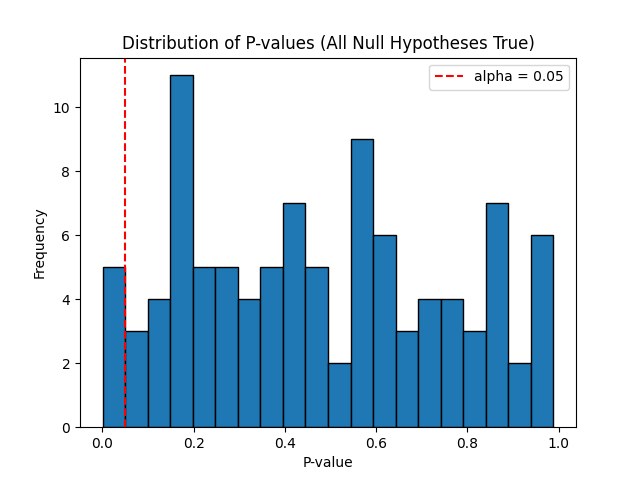

In [114]:
fig, ax = plt.subplots()
ax.hist(p_values, bins=20, edgecolor='black')
ax.axvline(alpha, color='red', linestyle='dashed', label=f'alpha = {alpha}')
ax.set_title('Distribution of P-values (All Null Hypotheses True)')
ax.set_xlabel('P-value')
ax.set_ylabel('Frequency')
ax.legend()

Solution: correct the significance level, e.g., using [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction).

Bonferroni correction rescales the significance level such so that we test for $p < \frac{\alpha}{M}$.

In [115]:
# Bonferroni Correction
alpha_bonf = alpha / n_tests
significant_bonf = np.sum(p_values < alpha_bonf)

print(f"Bonferroni Correction: {significant_bonf} significant results (alpha = {alpha_bonf:.5f})")

Bonferroni Correction: 1 significant results (alpha = 0.00050)


Without correction, we have a larger number of Type I errors, i.e., incorrectly reject the null hypothesis.
Multiple comparisons corrections help control the family-wise error rate.

But **increases** the probability of Type II errors, i.e., incorrectly accepting the null hypothesis.

# Fisher-Pitman permutation test
The Fisher-Pitman permutation test assess how surprising an observed outcome is under the assumption that no real effect exists.

This approach gave rise to what is now called **Fisher’s p-value**, which answers the question:

> _“How likely is it to observe a result as extreme as ours, if there were really no effect?”_

To answer this, we use **permutation tests** (also called randomization or exact tests) to simulate what would happen if treatment labels didn’t matter. We calculate the test statistic (like the difference in means) for every possible reassignment of group labels, building a null distribution. The **p-value** is the proportion of these permutations that are as extreme or more extreme than what we observed.

---

### A Small-Scale Example by Hand

Let’s walk through a classic example:

We have two small groups of mice:
- **Group A (Experimental drug)**: 30, 25, 20 seconds to complete a maze  
- **Group B (Placebo)**: 18, 21, 22 seconds

We want to know: is the observed difference in average times (25 vs. 20.33 seconds) meaningful, or could it have happened just by chance?

Since the total number of mice is small (6), we can compute all possible 20 combinations of 3-vs-3 groupings and examine the distribution of their mean differences. This is the essence of Fisher’s permutation logic.

By counting how many of those 20 permutations yield a difference in means as large as the one we observed, we compute the exact p-value.

In this case, only 3 permutations produced such a large difference—so the p-value is:

The p-value is $p = \frac{3}{20} = 0.15$.

That means: if there were really no drug effect, we would see such a big difference (or bigger) in 15% of cases just by random chance.

### Scalable Random Permutation Example

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from ipywidgets import interactive
import ipywidgets as widgets

In [6]:
def fisher_pitman_test(x, y, num_permutations=10000):
    observed = np.mean(y) - np.mean(x)
    combined = np.concatenate([x, y])
    n = len(x)
    perm_diffs = []
    
    for _ in range(num_permutations):
        shuffled = shuffle(combined)
        new_x = shuffled[:n]
        new_y = shuffled[n:]
        perm_diffs.append(np.mean(new_y) - np.mean(new_x))
    
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed))
    return observed, perm_diffs, p_value

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=10, step=10), FloatSlider(v…

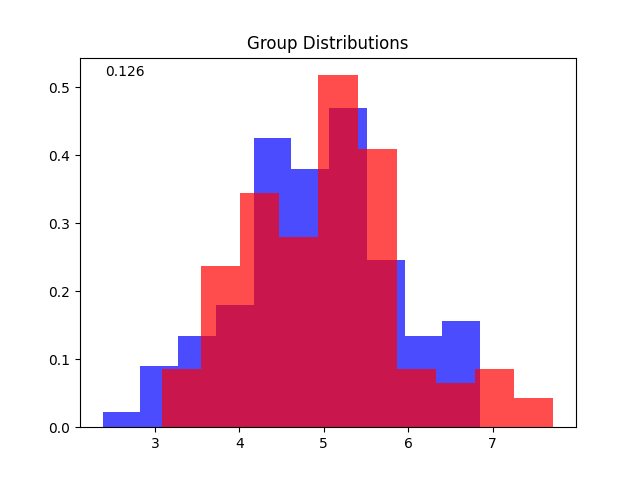

In [7]:
fig, ax = plt.subplots()

np.random.seed(42)


def statistic(x, y):
    return np.mean(x) - np.mean(y)


def update(sample_size, mean1, mean2):
    group1 = np.random.normal(loc=mean2, scale=1.0, size=sample_size)
    group2 = np.random.normal(loc=mean1, scale=1.0, size=sample_size)
    ax.clear()
    ax.hist(group1, alpha=0.7, bins=10, label='Group 1', color='blue', density=True)
    ax.hist(group2, alpha=0.7, bins=10, label='Group 2', color='red', density=True)
    ax.set_title("Group Distributions")
    obs_diff = np.mean(group2) - np.mean(group1)
    print(f"Observed difference in means: {obs_diff:.3f}")
    ax.text(0.05, 0.95, f"{obs_diff:.3f}", transform=ax.transAxes)
    obs_diff, perm_diffs, p_val = fisher_pitman_test(group1, group2)
    print(f"P-value: {p_val:.4f}")


interactive(
    update,
    sample_size=(10, 200, 10),
    # size2=(10, 200, 10),
    mean1=(2, 8, 0.1),
    mean2=(2, 8, 0.1),
)